<a href="https://colab.research.google.com/github/hwankang/hoggorm/blob/master/11(sun)_12_7_35_pm_all_data_B_NIR_20component_test_18_train_618_R2_0_899.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Partial Least Squares Regression (PLSR) on Raman data

This notebook illustrates how to use the **hoggorm** package to carry out partial least squares regression (PLSR) on multivariate data. Furthermore, we will learn how to visualise the results of the PLSR using the **hoggormPlot** package.

---

### Import packages and prepare data

First import **hoggorm** for analysis of the data and **hoggormPlot** for plotting of the analysis results. We'll also import **pandas** such that we can read the data into a data frame. **numpy** is needed for checking dimensions of the data.

In [ ]:
!wget https://github.com/olivertomic/hoggorm
!pip install hoggorm

--2022-12-11 09:36:03--  https://github.com/olivertomic/hoggorm
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘hoggorm’

hoggorm                 [ <=>                ] 287.81K  --.-KB/s    in 0.03s   

2022-12-11 09:36:03 (9.75 MB/s) - ‘hoggorm’ saved [294721]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 2.0 MB/s 


In [ ]:
!pip install hoggormplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import hoggorm as ho
import hoggormplot as hop
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#filename='/content/drive/MyDrive/machine_learning/123_Raman_DATA_csv.csv'
filename='/content/drive/MyDrive/machine_learning/B_NIR_DATA_csv.csv'
import pandas as pd
X2_df = pd.read_csv(filename,header=0,encoding="unicode-escape")
X2_df

Mounted at /content/drive


,Unnamed: 0,¸ðµ¨ Æ÷ÇÔ,Y_B,899.9280058,900.2520706,900.5763689,900.9009009,901.2256669,901.5506671,901.8759019,...,2477.700694,2480.15873,2482.621648,2485.089463,2487.562189,2490.039841,2492.522433,2495.00998,2497.502498,2500
0,1,True,2.0,0.276093,0.279368,0.282974,0.283645,0.283141,0.282718,0.281553,...,2.949425,2.949937,2.940435,2.930193,2.927044,2.926591,2.917971,2.911627,2.911584,2.909855
1,2,True,1.8,0.199544,0.202455,0.206198,0.207755,0.208028,0.207398,0.205435,...,2.981332,2.984826,2.975499,2.964666,2.964128,2.967567,2.960830,2.954538,2.956946,2.955335
2,3,True,6.7,0.306803,0.309845,0.313508,0.314680,0.314671,0.314172,0.312433,...,2.991938,2.992541,2.984488,2.976776,2.975918,2.973828,2.963011,2.955492,2.954702,2.949301
3,4,True,6.2,0.286879,0.290392,0.294110,0.294774,0.294035,0.293060,0.291292,...,2.991402,2.990624,2.980183,2.970664,2.967151,2.961850,2.948892,2.939125,2.938542,2.934796
4,5,False,5.1,0.253218,0.256407,0.260161,0.261418,0.261547,0.261116,0.259408,...,3.004459,3.005398,3.000151,2.995331,2.997660,2.999729,2.992129,2.987290,2.988690,2.987576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,620,True,8.6,0.231522,0.230534,0.231280,0.231104,0.230198,0.229698,0.229015,...,2.925508,2.927053,2.920447,2.915572,2.920224,2.922330,2.909775,2.897480,2.897737,2.897391
620,621,True,10.8,0.227531,0.226628,0.227406,0.227385,0.226585,0.225993,0.225327,...,2.945441,2.943505,2.933849,2.929372,2.934153,2.933573,2.921115,2.910637,2.914499,2.916288
621,622,True,12.2,0.224536,0.223379,0.224203,0.224431,0.223999,0.223736,0.222991,...,2.966221,2.969063,2.961253,2.952713,2.949854,2.944465,2.929207,2.920399,2.922437,2.923226
622,623,True,13.4,0.226519,0.225667,0.226440,0.226193,0.225218,0.224726,0.224143,...,2.936783,2.939133,2.927408,2.915374,2.913538,2.912847,2.901005,2.891991,2.894289,2.893951


In [ ]:
X3_df=X2_df.iloc[:,3:]
X3_df

,899.9280058,900.2520706,900.5763689,900.9009009,901.2256669,901.5506671,901.8759019,902.2013713,902.5270758,902.8530155,...,2477.700694,2480.15873,2482.621648,2485.089463,2487.562189,2490.039841,2492.522433,2495.00998,2497.502498,2500
0,0.276093,0.279368,0.282974,0.283645,0.283141,0.282718,0.281553,0.279137,0.279341,0.282978,...,2.949425,2.949937,2.940435,2.930193,2.927044,2.926591,2.917971,2.911627,2.911584,2.909855
1,0.199544,0.202455,0.206198,0.207755,0.208028,0.207398,0.205435,0.202679,0.203198,0.207066,...,2.981332,2.984826,2.975499,2.964666,2.964128,2.967567,2.960830,2.954538,2.956946,2.955335
2,0.306803,0.309845,0.313508,0.314680,0.314671,0.314172,0.312433,0.309447,0.309265,0.312464,...,2.991938,2.992541,2.984488,2.976776,2.975918,2.973828,2.963011,2.955492,2.954702,2.949301
3,0.286879,0.290392,0.294110,0.294774,0.294035,0.293060,0.291292,0.288594,0.288835,0.292392,...,2.991402,2.990624,2.980183,2.970664,2.967151,2.961850,2.948892,2.939125,2.938542,2.934796
4,0.253218,0.256407,0.260161,0.261418,0.261547,0.261116,0.259408,0.256675,0.257050,0.260721,...,3.004459,3.005398,3.000151,2.995331,2.997660,2.999729,2.992129,2.987290,2.988690,2.987576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,0.231522,0.230534,0.231280,0.231104,0.230198,0.229698,0.229015,0.227028,0.224940,0.224793,...,2.925508,2.927053,2.920447,2.915572,2.920224,2.922330,2.909775,2.897480,2.897737,2.897391
620,0.227531,0.226628,0.227406,0.227385,0.226585,0.225993,0.225327,0.223806,0.222423,0.222653,...,2.945441,2.943505,2.933849,2.929372,2.934153,2.933573,2.921115,2.910637,2.914499,2.916288
621,0.224536,0.223379,0.224203,0.224431,0.223999,0.223736,0.222991,0.220813,0.218589,0.218392,...,2.966221,2.969063,2.961253,2.952713,2.949854,2.944465,2.929207,2.920399,2.922437,2.923226
622,0.226519,0.225667,0.226440,0.226193,0.225218,0.224726,0.224143,0.222250,0.220084,0.219543,...,2.936783,2.939133,2.927408,2.915374,2.913538,2.912847,2.901005,2.891991,2.894289,2.893951


In [ ]:
int(X3_df.shape[0]*0.7), X3_df.shape[0]-int(X3_df.shape[0]*0.7)

(436, 188)

In [ ]:
#train_end=int(X3_df.shape[0]*0.7)
X_df_train =X3_df.iloc[18:,:]
X_df=X_df_train
X_df

,899.9280058,900.2520706,900.5763689,900.9009009,901.2256669,901.5506671,901.8759019,902.2013713,902.5270758,902.8530155,...,2477.700694,2480.15873,2482.621648,2485.089463,2487.562189,2490.039841,2492.522433,2495.00998,2497.502498,2500
18,0.139177,0.141888,0.145298,0.146474,0.146784,0.146697,0.145243,0.142502,0.142762,0.146550,...,2.932393,2.929565,2.921381,2.914567,2.913292,2.910229,2.901862,2.898216,2.903621,2.903067
19,0.150201,0.153044,0.156581,0.157760,0.157673,0.156915,0.154994,0.152210,0.152600,0.156411,...,2.943797,2.944384,2.932363,2.922442,2.926306,2.927773,2.914076,2.900709,2.899962,2.897292
20,0.250733,0.253317,0.256558,0.257606,0.257595,0.257003,0.255303,0.252790,0.253315,0.256932,...,3.034629,3.033398,3.025594,3.021798,3.026779,3.030004,3.018231,3.010140,3.011915,3.012127
21,0.406021,0.409663,0.413927,0.415266,0.414759,0.413630,0.411848,0.409522,0.410283,0.414297,...,2.992735,2.993004,2.985957,2.978901,2.977395,2.974942,2.963776,2.956788,2.959520,2.959698
22,0.156773,0.159704,0.163289,0.164755,0.165101,0.164654,0.162993,0.160581,0.161232,0.164964,...,2.954054,2.967308,2.953726,2.948256,2.956160,2.954848,2.935037,2.921605,2.921331,2.916948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,0.231522,0.230534,0.231280,0.231104,0.230198,0.229698,0.229015,0.227028,0.224940,0.224793,...,2.925508,2.927053,2.920447,2.915572,2.920224,2.922330,2.909775,2.897480,2.897737,2.897391
620,0.227531,0.226628,0.227406,0.227385,0.226585,0.225993,0.225327,0.223806,0.222423,0.222653,...,2.945441,2.943505,2.933849,2.929372,2.934153,2.933573,2.921115,2.910637,2.914499,2.916288
621,0.224536,0.223379,0.224203,0.224431,0.223999,0.223736,0.222991,0.220813,0.218589,0.218392,...,2.966221,2.969063,2.961253,2.952713,2.949854,2.944465,2.929207,2.920399,2.922437,2.923226
622,0.226519,0.225667,0.226440,0.226193,0.225218,0.224726,0.224143,0.222250,0.220084,0.219543,...,2.936783,2.939133,2.927408,2.915374,2.913538,2.912847,2.901005,2.891991,2.894289,2.893951


In [ ]:
X_df_test =X3_df.iloc[0:18,:]
X_df_test

,899.9280058,900.2520706,900.5763689,900.9009009,901.2256669,901.5506671,901.8759019,902.2013713,902.5270758,902.8530155,...,2477.700694,2480.15873,2482.621648,2485.089463,2487.562189,2490.039841,2492.522433,2495.00998,2497.502498,2500
0,0.276093,0.279368,0.282974,0.283645,0.283141,0.282718,0.281553,0.279137,0.279341,0.282978,...,2.949425,2.949937,2.940435,2.930193,2.927044,2.926591,2.917971,2.911627,2.911584,2.909855
1,0.199544,0.202455,0.206198,0.207755,0.208028,0.207398,0.205435,0.202679,0.203198,0.207066,...,2.981332,2.984826,2.975499,2.964666,2.964128,2.967567,2.960830,2.954538,2.956946,2.955335
2,0.306803,0.309845,0.313508,0.314680,0.314671,0.314172,0.312433,0.309447,0.309265,0.312464,...,2.991938,2.992541,2.984488,2.976776,2.975918,2.973828,2.963011,2.955492,2.954702,2.949301
3,0.286879,0.290392,0.294110,0.294774,0.294035,0.293060,0.291292,0.288594,0.288835,0.292392,...,2.991402,2.990624,2.980183,2.970664,2.967151,2.961850,2.948892,2.939125,2.938542,2.934796
4,0.253218,0.256407,0.260161,0.261418,0.261547,0.261116,0.259408,0.256675,0.257050,0.260721,...,3.004459,3.005398,3.000151,2.995331,2.997660,2.999729,2.992129,2.987290,2.988690,2.987576
5,0.165341,0.168096,0.171707,0.173095,0.173221,0.172616,0.170830,0.168136,0.168463,0.172067,...,2.992120,2.991850,2.980991,2.972400,2.972670,2.972324,2.958664,2.948479,2.948137,2.944359
6,0.220883,0.223903,0.227404,0.228520,0.228443,0.227757,0.226051,0.223639,0.224288,0.228008,...,2.954999,2.959127,2.950034,2.941829,2.942999,2.944108,2.935344,2.925908,2.926498,2.927566
7,0.128466,0.131093,0.134434,0.135520,0.135453,0.134727,0.132757,0.129794,0.129877,0.133345,...,2.965950,2.964856,2.951359,2.940985,2.940009,2.939985,2.929271,2.922497,2.923163,2.921886
8,0.126331,0.129429,0.133110,0.134365,0.134569,0.134341,0.132864,0.130208,0.130523,0.134228,...,2.955796,2.957617,2.948017,2.939907,2.942179,2.943938,2.935434,2.924869,2.922034,2.920252
9,0.291173,0.294134,0.297736,0.298926,0.298955,0.298521,0.297009,0.294487,0.294844,0.298385,...,2.975130,2.975795,2.966461,2.961597,2.965299,2.965209,2.954790,2.945580,2.943033,2.938797


In [ ]:
Y3_df=X2_df.iloc[:,2:3]
Y3_df

,Y_B
0,2.0
1,1.8
2,6.7
3,6.2
4,5.1
...,...
619,8.6
620,10.8
621,12.2
622,13.4


In [ ]:
Y_df_target =Y3_df.iloc[18:,:]
Y_df=Y_df_target
Y_df

,Y_B
18,0.0
19,0.0
20,0.0
21,0.0
22,0.0
...,...
619,8.6
620,10.8
621,12.2
622,13.4


In [ ]:
Y_df_ground =Y3_df.iloc[0:18,:]
Y_df_true= Y_df_ground
Y_df_true

,Y_B
0,2.0
1,1.8
2,6.7
3,6.2
4,5.1
5,13.7
6,0.0
7,0.0
8,0.0
9,0.0


Next, load the data that we are going to analyse using **hoggorm**. After the data has been loaded into the pandas data frame, we'll display it in the notebook.

The ``nipalsPLS2`` class in hoggorm accepts only **numpy** arrays with numerical values and not pandas data frames. Therefore, the pandas data frames holding the imported data need to be "taken apart" into three parts: 
* two numpy array holding the numeric values
* two Python list holding variable (column) names
* two Python list holding object (row) names. 

The numpy arrays with values will be used as input for the ``nipalsPLS2`` class for analysis. The Python lists holding the variable and row names will be used later in the plotting function from the **hoggormPlot** package when visualising the results of the analysis. Below is the code needed to access both data, variable names and object names.

In [ ]:
# Get the values from the data frame
X = X_df.values
Y = Y_df.values

# Get the variable or columns names
X_varNames = list(X_df.columns)
Y_varNames = list(Y_df.columns)

# Get the object or row names
X_objNames = list(X_df.index)
Y_objNames = list(Y_df.index)

---

### Apply PLSR to our data

Now, let's run PLSR on the data using the ``nipalsPLS2`` class. The documentation provides a [description of the input parameters](https://hoggorm.readthedocs.io/en/latest/plsr.html). Using input paramter ``arrX`` and ``arrY`` we define which numpy array we would like to analyse. ``arrY`` is what typically is considered to be the response matrix, while the measurements are typically defined as ``arrX``. By setting input parameter ``Xstand=False`` and ``Ystand=False`` we make sure that the variables are only mean centered, not scaled to unit variance, if this is what you want. This is the default setting and actually doesn't need to expressed explicitly. Setting paramter ``cvType=["loo"]`` we make sure that we compute the PLS2 model using full cross validation. ``"loo"`` means "Leave One Out". By setting paramter ``numpComp=4`` we ask for four components to be computed.

In [ ]:
model = ho.nipalsPLS2(arrX=X, Xstand=False, 
                      arrY=Y, Ystand=False,
                      cvType=["loo"], 
                      numComp=20)

loo


That's it, the PLS2 model has been computed. Now we would like to inspect the results by visualising them. We can do this using plotting functions of the separate [**hoggormPlot** package](https://hoggormplot.readthedocs.io/en/latest/). If we wish to plot the results for component 1 and component 2, we can do this by setting the input argument ``comp=[1, 2]``. The input argument ``plots=[1, 2, 3, 4, 6]`` lets the user define which plots are to be plotted. If this list for example contains value ``1``, the function will generate the scores plot for the model. If the list contains value ``2``, then the loadings plot will be plotted. Value ``3`` stands for correlation loadings plot and value ``4`` stands for bi-plot and ``6`` stands for explained variance plot. The hoggormPlot documentation provides a [description of input paramters](https://hoggormplot.readthedocs.io/en/latest/mainPlot.html).

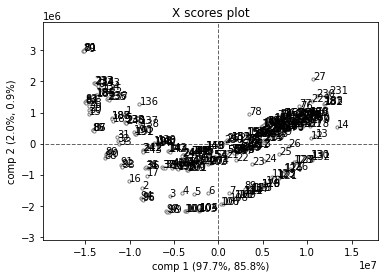

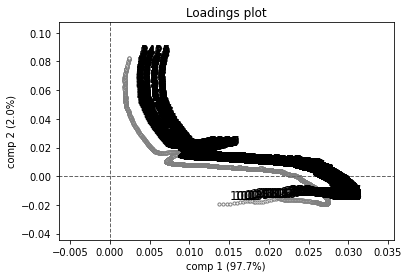

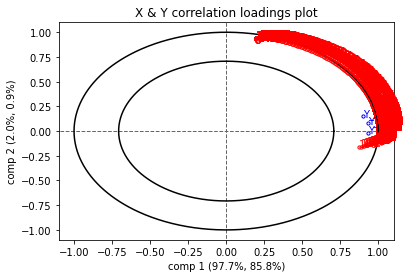

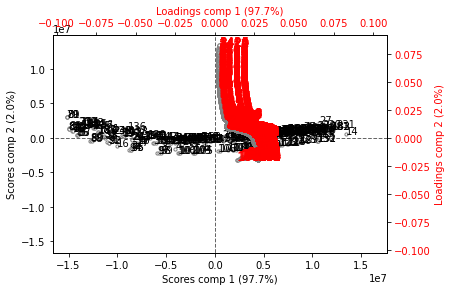

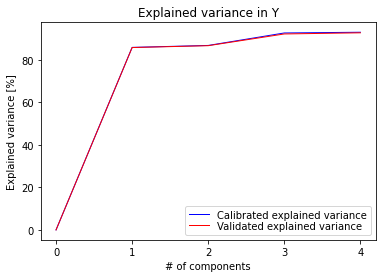

In [ ]:
hop.plot(model, comp=[1, 2], 
         plots=[1, 2, 3, 4, 6], 
         objNames=X_objNames, 
         XvarNames=X_varNames,
         YvarNames=Y_varNames)

Plots can also be called separately.

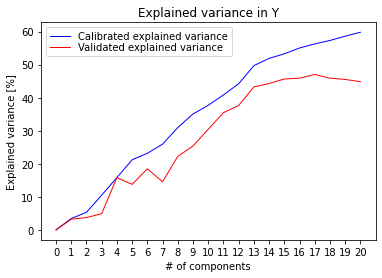

In [ ]:
# Plot cumulative explained variance (both calibrated and validated) using a specific function for that.
hop.explainedVariance(model)

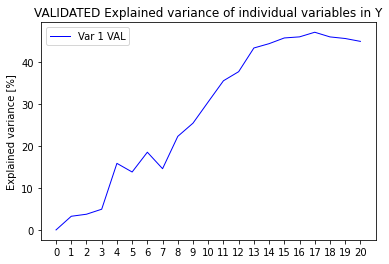

In [ ]:
# Plot cumulative validated explained variance for each variable in Y
hop.explainedVariance(model, individual = True)

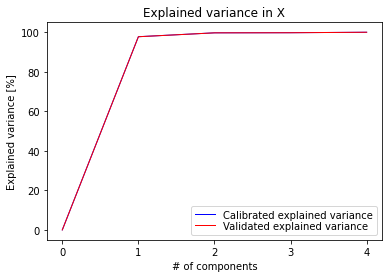

In [ ]:
# Plot cumulative validated explained variance in X.
hop.explainedVariance(model, which=['X'])

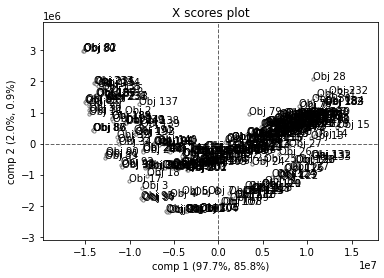

In [ ]:
hop.scores(model)

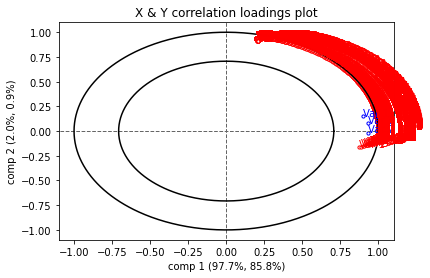

In [ ]:
hop.correlationLoadings(model)

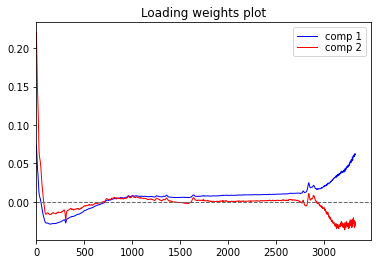

In [ ]:
# Plot X loadings in line plot
hop.loadings(model, weights=True, line=True)

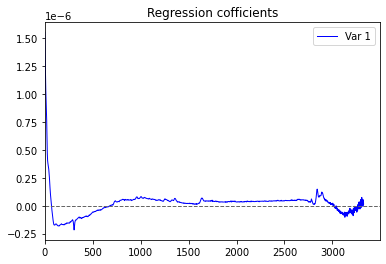

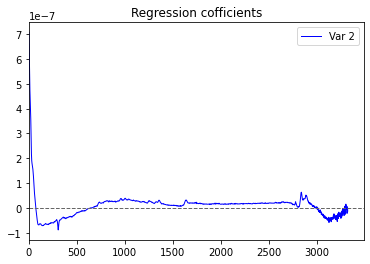

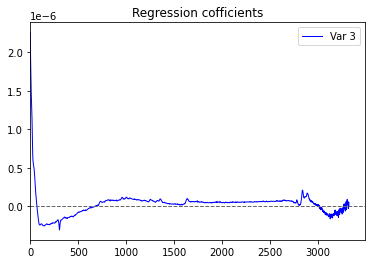

In [ ]:
# Plot regression coefficients
hop.coefficients(model, comp=[3])

---

### Accessing numerical results

Now that we have visualised the PLSR results, we may also want to access the numerical results. Below are some examples. For a complete list of accessible results, please see this part of the documentation.  

In [ ]:
# Get X scores and store in numpy array
X_scores = model.X_scores()

# Get scores and store in pandas dataframe with row and column names
X_scores_df = pd.DataFrame(model.X_scores())
X_scores_df.index = X_objNames
X_scores_df.columns = ['comp {0}'.format(x+1) for x in range(model.X_scores().shape[1])]
X_scores_df

,comp 1,comp 2,comp 3,comp 4
0,-1.355754e+07,1.843434e+06,179769.490787,-67871.912567
1,-1.047200e+07,9.677713e+05,78070.925346,-268165.681728
2,-8.587706e+06,-1.431824e+06,78830.343044,168235.943583
3,-5.483280e+06,-1.683242e+06,-18427.088611,-265048.132918
4,-4.049754e+06,-1.595788e+06,-38613.177573,-403864.463858
...,...,...,...,...
277,1.033825e+07,6.975819e+05,-323524.844919,721440.770022
278,1.033645e+07,5.754447e+05,-316892.532923,777440.982271
279,1.044413e+07,6.850059e+05,-336118.587362,722990.416451
280,1.044356e+07,7.427409e+05,-352176.142048,681239.586270


In [ ]:
help(ho.nipalsPLS2.X_scores)

Help on function X_scores in module hoggorm.plsr2:

X_scores(self)
    Returns array holding scores of array X. First column holds scores
    for component 1, second column holds scores for component 2, etc.



In [ ]:
# Dimension of the X_scores
np.shape(model.X_scores())

(282, 4)

We see that the numpy array holds the scores for all countries and OECD (35 in total) for four components as required when computing the PCA model.

In [ ]:
# Get X loadings and store in numpy array
X_loadings = model.X_loadings()

# Get X loadings and store in pandas dataframe with row and column names
X_loadings_df = pd.DataFrame(model.X_loadings())
X_loadings_df.index = X_varNames
X_loadings_df.columns = ['comp {0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
X_loadings_df

,comp 1,comp 2,comp 3,comp 4
100,0.013755,-0.019506,0.221105,-0.101850
101,0.014220,-0.019559,0.215453,-0.100283
102,0.014685,-0.019401,0.208524,-0.098414
103,0.015143,-0.019104,0.200689,-0.096297
104,0.015581,-0.018738,0.192376,-0.094002
...,...,...,...,...
3421,0.002385,0.081396,-0.065037,-0.076728
3422,0.002395,0.081481,-0.065499,-0.076653
3423,0.002421,0.081921,-0.066171,-0.076805
3424,0.002447,0.082308,-0.066688,-0.077310


In [ ]:
help(ho.nipalsPLS2.X_loadings)

Help on function X_loadings in module hoggorm.plsr2:

X_loadings(self)
    Returns array holding loadings of array X. Rows represent variables
    and columns represent components. First column holds loadings for
    component 1, second column holds scores for component 2, etc.



In [ ]:
np.shape(model.X_loadings())

(3326, 4)

Here we see that the array holds the loadings for the 10 variables in the data across four components.

In [ ]:
# Get Y loadings and store in numpy array
Y_loadings = model.Y_loadings()

# Get Y loadings and store in pandas dataframe with row and column names
Y_loadings_df = pd.DataFrame(model.Y_loadings())
Y_loadings_df.index = Y_varNames
Y_loadings_df.columns = ['comp {0}'.format(x+1) for x in range(model.Y_loadings().shape[1])]
Y_loadings_df

,comp 1,comp 2,comp 3,comp 4
Y_1,4.604587e-07,6.048015e-07,0.000006,5.397180e-07
Y_2,3.762306e-07,-4.622726e-08,0.000003,-1.180284e-06
Y_3,8.367061e-07,5.575783e-07,0.000009,-6.475178e-07


In [ ]:
# Get X correlation loadings and store in numpy array
X_corrloadings = model.X_corrLoadings()

# Get X correlation loadings and store in pandas dataframe with row and column names
X_corrloadings_df = pd.DataFrame(model.X_corrLoadings())
X_corrloadings_df.index = X_varNames
X_corrloadings_df.columns = ['comp {0}'.format(x+1) for x in range(model.X_corrLoadings().shape[1])]
X_corrloadings_df

,comp 1,comp 2,comp 3,comp 4
100,0.874939,-0.159756,0.346954,-0.287976
101,0.885343,-0.156804,0.330933,-0.277546
102,0.895917,-0.152408,0.313837,-0.266887
103,0.906187,-0.147208,0.296283,-0.256166
104,0.915743,-0.141805,0.278931,-0.245587
...,...,...,...,...
3421,0.207145,0.910231,-0.139344,-0.296213
3422,0.207681,0.909953,-0.140145,-0.295524
3423,0.208795,0.909543,-0.140757,-0.294387
3424,0.209924,0.909272,-0.141148,-0.294841


In [ ]:
help(ho.nipalsPLS2.X_corrLoadings)

Help on function X_corrLoadings in module hoggorm.plsr2:

X_corrLoadings(self)
    Returns array holding correlation loadings of array X. First column
    holds correlation loadings for component 1, second column holds
    correlation loadings for component 2, etc.



In [ ]:
# Get Y loadings and store in numpy array
Y_corrloadings = model.X_corrLoadings()

# Get Y loadings and store in pandas dataframe with row and column names
Y_corrloadings_df = pd.DataFrame(model.Y_corrLoadings())
Y_corrloadings_df.index = Y_varNames
Y_corrloadings_df.columns = ['comp {0}'.format(x+1) for x in range(model.Y_corrLoadings().shape[1])]
Y_corrloadings_df

,comp 1,comp 2,comp 3,comp 4
Y_1,0.897752,0.151834,0.284541,0.046776
Y_2,0.933279,-0.014765,0.169812,-0.130147
Y_3,0.933869,0.080133,0.239458,-0.032126


In [ ]:
help(ho.nipalsPLS2.Y_corrLoadings)

Help on function Y_corrLoadings in module hoggorm.plsr2:

Y_corrLoadings(self)
    Returns array holding correlation loadings of array X. First column
    holds correlation loadings for component 1, second column holds
    correlation loadings for component 2, etc.



In [ ]:
# Get calibrated explained variance of each component in X
X_calExplVar = model.X_calExplVar()

# Get calibrated explained variance in X and store in pandas dataframe with row and column names
X_calExplVar_df = pd.DataFrame(model.X_calExplVar())
X_calExplVar_df.columns = ['calibrated explained variance in X']
X_calExplVar_df.index = ['comp {0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
X_calExplVar_df

,calibrated explained variance in X
comp 1,97.702478
comp 2,1.955056
comp 3,0.063630
comp 4,0.231962


In [ ]:
help(ho.nipalsPLS2.X_calExplVar)

Help on function X_calExplVar in module hoggorm.plsr2:

X_calExplVar(self)
    Returns a list holding the calibrated explained variance for
    each component. First number in list is for component 1, second number
    for component 2, etc.



In [ ]:
# Get calibrated explained variance of each component in Y
Y_calExplVar = model.Y_calExplVar()

# Get calibrated explained variance in Y and store in pandas dataframe with row and column names
Y_calExplVar_df = pd.DataFrame(model.Y_calExplVar())
Y_calExplVar_df.columns = ['calibrated explained variance in Y']
Y_calExplVar_df.index = ['comp {0}'.format(x+1) for x in range(model.Y_loadings().shape[1])]
Y_calExplVar_df

,calibrated explained variance in Y
comp 1,85.779796
comp 2,0.916267
comp 3,5.862852
comp 4,0.338407


In [ ]:
help(ho.nipalsPLS2.Y_calExplVar)

Help on function Y_calExplVar in module hoggorm.plsr2:

Y_calExplVar(self)
    Returns a list holding the calibrated explained variance for each
    component. First number in list is for component 1, second number for
    component 2, etc.



In [ ]:
# Get cumulative calibrated explained variance in X
X_cumCalExplVar = model.X_cumCalExplVar()

# Get cumulative calibrated explained variance in X and store in pandas dataframe with row and column names
X_cumCalExplVar_df = pd.DataFrame(model.X_cumCalExplVar())
X_cumCalExplVar_df.columns = ['cumulative calibrated explained variance in X']
X_cumCalExplVar_df.index = ['comp {0}'.format(x) for x in range(model.X_loadings().shape[1] + 1)]
X_cumCalExplVar_df

,cumulative calibrated explained variance in X
comp 0,0.000000
comp 1,97.702478
comp 2,99.657534
comp 3,99.721164
comp 4,99.953126


In [ ]:
help(ho.nipalsPLS2.X_cumCalExplVar)

Help on function X_cumCalExplVar in module hoggorm.plsr2:

X_cumCalExplVar(self)
    Returns a list holding the cumulative calibrated explained variance
    for array X after each component.



In [ ]:
# Get cumulative calibrated explained variance in Y
Y_cumCalExplVar = model.Y_cumCalExplVar()

# Get cumulative calibrated explained variance in Y and store in pandas dataframe with row and column names
Y_cumCalExplVar_df = pd.DataFrame(model.Y_cumCalExplVar())
Y_cumCalExplVar_df.columns = ['cumulative calibrated explained variance in Y']
Y_cumCalExplVar_df.index = ['comp {0}'.format(x) for x in range(model.Y_loadings().shape[1] + 1)]
Y_cumCalExplVar_df

,cumulative calibrated explained variance in Y
comp 0,0.000000
comp 1,85.779796
comp 2,86.696063
comp 3,92.558915
comp 4,92.897322


In [ ]:
help(ho.nipalsPLS2.Y_cumCalExplVar)

Help on function Y_cumCalExplVar in module hoggorm.plsr2:

Y_cumCalExplVar(self)
    Returns a list holding the cumulative calibrated explained variance
    for array X after each component. First number represents zero
    components, second number represents component 1, etc.



In [ ]:
# Get cumulative calibrated explained variance for each variable in X
X_cumCalExplVar_ind = model.X_cumCalExplVar_indVar()

# Get cumulative calibrated explained variance for each variable in X and store in pandas dataframe with row and column names
X_cumCalExplVar_ind_df = pd.DataFrame(model.X_cumCalExplVar_indVar())
X_cumCalExplVar_ind_df.columns = X_varNames
X_cumCalExplVar_ind_df.index = ['comp {0}'.format(x) for x in range(model.X_loadings().shape[1] + 1)]
X_cumCalExplVar_ind_df

,100,101,102,103,104,105,106,107,108,109,...,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425
comp 0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
comp 1,76.551885,78.383265,80.266735,82.117418,83.858466,85.431300,86.801554,87.957983,88.906864,89.665828,...,4.132185,4.162900,4.306904,4.369944,4.320164,4.290904,4.313134,4.359528,4.406828,4.406308
comp 2,79.104097,80.842019,82.589543,84.284445,85.869331,87.299295,88.547603,89.606012,90.480881,91.188275,...,87.653657,87.788638,87.957585,87.575217,87.202228,87.142985,87.114636,87.086296,87.084384,87.001355
comp 3,91.141825,91.793672,92.438896,93.062809,93.649585,94.185512,94.661400,95.073000,95.419910,95.704578,...,89.442145,89.781145,90.013263,89.566111,89.144136,89.084660,89.078688,89.067552,89.076669,89.008271
comp 4,99.434818,99.496850,99.561743,99.624886,99.680875,99.725695,99.757962,99.778746,99.790472,99.795761,...,98.309802,98.261000,98.157104,97.921336,97.830073,97.858891,97.812117,97.733912,97.769791,97.871880


In [ ]:
help(ho.nipalsPLS2.X_cumCalExplVar_indVar)

Help on function X_cumCalExplVar_indVar in module hoggorm.plsr2:

X_cumCalExplVar_indVar(self)
    Returns an array holding the cumulative calibrated explained variance
    for each variable in X after each component. First row represents zero
    components, second row represents one component, third row represents
    two components, etc. Columns represent variables.



In [ ]:
# Get cumulative calibrated explained variance for each variable in Y
Y_cumCalExplVar_ind = model.Y_cumCalExplVar_indVar()

# Get cumulative calibrated explained variance for each variable in Y and store in pandas dataframe with row and column names
Y_cumCalExplVar_ind_df = pd.DataFrame(model.Y_cumCalExplVar_indVar())
Y_cumCalExplVar_ind_df.columns = Y_varNames
Y_cumCalExplVar_ind_df.index = ['comp {0}'.format(x) for x in range(model.Y_loadings().shape[1] + 1)]
Y_cumCalExplVar_ind_df

,Y_1,Y_2,Y_3
comp 0,0.000000,0.000000,0.000000
comp 1,80.595945,87.100925,87.211156
comp 2,82.901305,87.122726,87.853281
comp 3,90.997684,90.006351,93.587311
comp 4,91.216482,91.700164,93.690518


In [ ]:
help(ho.nipalsPLS2.Y_cumCalExplVar_indVar)

Help on function Y_cumCalExplVar_indVar in module hoggorm.plsr2:

Y_cumCalExplVar_indVar(self)
    Returns an array holding the cumulative calibrated explained variance
    for each variable in Y after each component. First row represents zero
    components, second row represents one component, third row represents
    two components, etc. Columns represent variables.



In [ ]:
# Get calibrated predicted Y for a given number of components

# Predicted Y from calibration using 1 component
Y_from_1_component = model.Y_predCal()[1]

# Predicted Y from calibration using 1 component stored in pandas data frame with row and columns names
Y_from_1_component_df = pd.DataFrame(model.Y_predCal()[1])
Y_from_1_component_df.index = Y_objNames
Y_from_1_component_df.columns = Y_varNames
Y_from_1_component_df

,Y_1,Y_2,Y_3
0,-1.393011,0.772412,-0.618010
1,0.027755,1.933288,1.963684
2,0.895393,2.642216,3.540281
3,2.324853,3.810196,6.137773
4,2.984933,4.349532,7.337213
...,...,...,...
277,9.610015,9.762740,19.375744
278,9.609184,9.762061,19.374234
279,9.658769,9.802576,19.464336
280,9.658505,9.802360,19.463855


In [ ]:
# Get calibrated predicted Y for a given number of components

# Predicted Y from calibration using 4 component
Y_from_4_component = model.Y_predCal()[4]

# Predicted Y from calibration using 1 component stored in pandas data frame with row and columns names
Y_from_4_component_df = pd.DataFrame(model.Y_predCal()[4])
Y_from_4_component_df.index = Y_objNames
Y_from_4_component_df.columns = Y_varNames
Y_from_4_component_df

,Y_1,Y_2,Y_3
0,0.748747,1.266143,2.017181
1,0.930182,2.421701,3.355887
2,0.586567,2.728584,3.318547
3,1.054764,4.149707,5.210604
4,1.573398,4.792829,6.373142
...,...,...,...
277,8.507384,7.981243,16.483986
278,8.502144,7.938518,16.435793
279,8.474867,7.984885,16.455040
280,8.391994,7.986720,16.374139


In [ ]:
help(ho.nipalsPLS2.X_predCal)

Help on function X_predCal in module hoggorm.plsr2:

X_predCal(self)
    Returns a dictionary holding the predicted arrays Xhat from
    calibration after each computed component. Dictionary key represents
    order of component.



In [ ]:
# Get validated explained variance of each component X
X_valExplVar = model.X_valExplVar()

# Get calibrated explained variance in X and store in pandas dataframe with row and column names
X_valExplVar_df = pd.DataFrame(model.X_valExplVar())
X_valExplVar_df.columns = ['validated explained variance in X']
X_valExplVar_df.index = ['comp {0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
X_valExplVar_df

,validated explained variance in X
comp 1,97.679232
comp 2,1.973341
comp 3,0.050838
comp 4,0.248110


In [ ]:
help(ho.nipalsPLS2.X_valExplVar)

Help on function X_valExplVar in module hoggorm.plsr2:

X_valExplVar(self)
    Returns a list holding the validated explained variance for X after
    each component. First number in list is for component 1, second number
    for component 2, third number for component 3, etc.



In [ ]:
# Get validated explained variance of each component Y
Y_valExplVar = model.Y_valExplVar()

# Get calibrated explained variance in X and store in pandas dataframe with row and column names
Y_valExplVar_df = pd.DataFrame(model.Y_valExplVar())
Y_valExplVar_df.columns = ['validated explained variance in Y']
Y_valExplVar_df.index = ['comp {0}'.format(x+1) for x in range(model.Y_loadings().shape[1])]
Y_valExplVar_df

,validated explained variance in Y
comp 1,85.707892
comp 2,0.875548
comp 3,5.510579
comp 4,0.540663


In [ ]:
help(ho.nipalsPLS2.Y_valExplVar)

Help on function Y_valExplVar in module hoggorm.plsr2:

Y_valExplVar(self)
    Returns a list holding the validated explained variance for Y after
    each component. First number in list is for component 1, second number
    for component 2, third number for component 3, etc.



In [ ]:
# Get cumulative validated explained variance in X
X_cumValExplVar = model.X_cumValExplVar()

# Get cumulative validated explained variance in X and store in pandas dataframe with row and column names
X_cumValExplVar_df = pd.DataFrame(model.X_cumValExplVar())
X_cumValExplVar_df.columns = ['cumulative validated explained variance in X']
X_cumValExplVar_df.index = ['comp {0}'.format(x) for x in range(model.X_loadings().shape[1] + 1)]
X_cumValExplVar_df

,cumulative validated explained variance in X
comp 0,0.000000
comp 1,97.679232
comp 2,99.652573
comp 3,99.703411
comp 4,99.951521


In [ ]:
help(ho.nipalsPLS2.X_cumValExplVar)

Help on function X_cumValExplVar in module hoggorm.plsr2:

X_cumValExplVar(self)
    Returns a list holding the cumulative validated explained variance
    for array X after each component. First number represents zero
    components, second number represents component 1, etc.



In [ ]:
# Get cumulative validated explained variance in Y
Y_cumValExplVar = model.Y_cumValExplVar()

# Get cumulative validated explained variance in Y and store in pandas dataframe with row and column names
Y_cumValExplVar_df = pd.DataFrame(model.Y_cumValExplVar())
Y_cumValExplVar_df.columns = ['cumulative validated explained variance in Y']
Y_cumValExplVar_df.index = ['comp {0}'.format(x) for x in range(model.Y_loadings().shape[1] + 1)]
Y_cumValExplVar_df

,cumulative validated explained variance in Y
comp 0,0.000000
comp 1,85.707892
comp 2,86.583440
comp 3,92.094020
comp 4,92.634683


In [ ]:
help(ho.nipalsPLS2.Y_cumValExplVar)

Help on function Y_cumValExplVar in module hoggorm.plsr2:

Y_cumValExplVar(self)
    Returns a list holding the cumulative validated explained variance
    for array X after each component. First number represents zero
    components, second number represents component 1, etc.



In [ ]:
# Get cumulative validated explained variance for each variable in Y
Y_cumCalExplVar_ind = model.Y_cumCalExplVar_indVar()

# Get cumulative validated explained variance for each variable in Y and store in pandas dataframe with row and column names
Y_cumValExplVar_ind_df = pd.DataFrame(model.Y_cumValExplVar_indVar())
Y_cumValExplVar_ind_df.columns = Y_varNames
Y_cumValExplVar_ind_df.index = ['comp {0}'.format(x) for x in range(model.Y_loadings().shape[1] + 1)]
Y_cumValExplVar_ind_df

,Y_1,Y_2,Y_3
comp 0,0.000000,0.000000,0.000000
comp 1,80.486513,87.020179,87.153340
comp 2,82.745287,86.996716,87.757589
comp 3,90.495697,89.435177,93.156087
comp 4,90.936415,91.273250,93.466846


In [ ]:
help(ho.nipalsPLS2.X_cumValExplVar_indVar)

Help on function X_cumValExplVar_indVar in module hoggorm.plsr2:

X_cumValExplVar_indVar(self)
    Returns an array holding the cumulative validated explained variance
    for each variable in X after each component. First row represents
    zero components, second row represents component 1, third row for
    compnent 2, etc. Columns represent variables.



In [ ]:
# Get validated predicted Y for a given number of components

# Predicted Y from validation using 1 component
Y_from_1_component_val = model.Y_predVal()[1]

# Predicted Y from calibration using 1 component stored in pandas data frame with row and columns names
Y_from_1_component_val_df = pd.DataFrame(model.Y_predVal()[1])
Y_from_1_component_val_df.index = Y_objNames
Y_from_1_component_val_df.columns = Y_varNames
Y_from_1_component_val_df

,Y_B
18,4.406565
19,4.361438
20,4.662411
21,4.795776
22,-0.040921
...,...
619,4.891003
620,4.896523
621,4.892018
622,4.974334


In [ ]:
# Get validated predicted Y for a given number of components

# Predicted Y from validation using 3 components
Y_from_3_component_val = model.Y_predVal()[20]

# Predicted Y from calibration using 3 components stored in pandas data frame with row and columns names
Y_from_3_component_val_df = pd.DataFrame(model.Y_predVal()[20])
Y_from_3_component_val_df.index = Y_objNames
Y_from_3_component_val_df.columns = Y_varNames
Y_from_3_component_val_df

,Y_B
18,1.339401
19,2.484276
20,0.794022
21,4.680799
22,-2.727312
...,...
619,10.397317
620,8.713784
621,11.641853
622,12.452252


In [ ]:
help(ho.nipalsPLS2.Y_predVal)

Help on function Y_predVal in module hoggorm.plsr2:

Y_predVal(self)
    Returns dictionary holding arrays of predicted Yhat after each
    component from validation. Dictionary key represents order of
    component.



In [ ]:
new_X =X_df_test
# Now insert the new data into the existing model and compute scores for two components (numComp=2)
#pred_X_scores = model.X_scores_predict(new_X, numComp=2)
pred_X_scores = model.X_scores_predict(new_X, numComp=20)

# Same as above, but results stored in a pandas dataframe with row names and column names
pred_X_scores_df = pd.DataFrame(model.X_scores_predict(new_X, numComp=20))
pred_X_scores_df.columns = ['comp {0}'.format(x+1) for x in range(20)]
pred_X_scores_df.index = ['new object {0}'.format(x+1) for x in range(np.shape(new_X)[0])]
pred_X_scores_df

,comp 1,comp 2,comp 3,comp 4,comp 5,comp 6,comp 7,comp 8,comp 9,comp 10,comp 11,comp 12,comp 13,comp 14,comp 15,comp 16,comp 17,comp 18,comp 19,comp 20
new object 1,4.681544,2.081836,-0.462689,-0.106402,-0.334583,3.467190,0.350804,-0.167409,0.372609,0.633747,0.190683,-0.170120,-0.183458,-0.109643,0.181330,-0.175162,-0.063476,0.073642,-0.094437,-0.001732
new object 2,3.075278,0.959103,-0.232614,-0.099093,-0.309686,1.142094,0.112111,-0.211832,0.208804,0.382313,0.007148,-0.016301,-0.067551,-0.043147,0.044802,-0.055118,0.048096,0.037018,-0.047026,-0.028567
new object 3,5.128682,2.260371,-0.658607,-0.220128,-0.442180,4.253884,0.445462,-0.153210,0.426599,0.664273,0.327688,0.007064,-0.011296,-0.109549,0.118358,-0.076791,0.011533,-0.022083,-0.099586,-0.049877
new object 4,6.022001,2.566212,-0.586269,-0.032730,-0.538298,3.112081,0.306577,-0.272121,0.429122,0.545562,0.310798,0.177548,0.156745,-0.020723,0.121377,-0.040201,0.060823,0.014232,0.005310,-0.018874
new object 5,2.788395,1.062184,-0.282510,0.067521,-0.065095,3.455049,0.102114,-0.328890,0.113171,0.539990,0.017363,-0.193737,0.080549,0.043710,0.217341,-0.085910,0.063190,0.055952,-0.108405,-0.042911
new object 6,-8.647837,-2.120171,-0.287867,0.237624,0.317618,2.385880,-0.729335,-0.293022,0.129567,0.106577,0.258228,0.183711,-0.238743,0.126641,0.083841,0.052126,-0.040591,-0.065508,-0.018137,-0.003030
new object 7,3.512541,1.366661,-0.229803,-0.137012,-0.344651,1.529898,0.163125,-0.199248,0.197625,0.306040,0.079032,-0.036031,-0.057482,-0.033430,0.097955,-0.045029,0.072182,0.017920,-0.065169,-0.028007
new object 8,1.002644,-0.079488,0.045390,-0.153165,-0.028626,-0.590604,-0.023047,-0.066697,0.085362,0.189037,-0.076352,-0.093448,-0.061145,-0.075067,-0.065810,-0.040451,-0.011550,-0.019763,-0.031650,-0.011195
new object 9,1.827036,0.144888,0.058043,-0.033415,-0.086301,-0.933813,-0.060575,-0.143339,0.053550,0.148012,-0.092532,-0.098417,-0.038081,-0.029464,-0.060719,-0.030734,-0.018081,0.006874,-0.030422,-0.009787
new object 10,5.193330,2.306545,-0.612626,-0.278158,-0.477695,3.625349,0.339662,-0.135470,0.439001,0.571008,0.261969,0.017793,-0.077309,-0.089218,0.139610,-0.064470,0.039867,0.023282,-0.077807,-0.065835


In [ ]:
# Get predicted scores for new measurements (objects) of X

# First pretend that we acquired new X data by using part of the existing data and overlaying some noise
import numpy.random as npr
new_X = X[0:4, :] + npr.rand(4, np.shape(X)[1])
np.shape(X)

# Now insert the new data into the existing model and compute scores for two components (numComp=2)
pred_X_scores = model.X_scores_predict(new_X, numComp=2)

# Same as above, but results stored in a pandas dataframe with row names and column names
pred_X_scores_df = pd.DataFrame(model.X_scores_predict(new_X, numComp=2))
pred_X_scores_df.columns = ['comp {0}'.format(x+1) for x in range(2)]
pred_X_scores_df.index = ['new object {0}'.format(x+1) for x in range(np.shape(new_X)[0])]
pred_X_scores_df

,comp 1,comp 2
new object 1,15.645975,3.644046
new object 2,15.106755,4.191548
new object 3,17.192211,4.291514
new object 4,17.574309,6.035845


In [ ]:
help(ho.nipalsPLS2.X_scores_predict)

Help on function X_scores_predict in module hoggorm.plsr2:

X_scores_predict(self, Xnew, numComp=None)
    Returns array of X scores from new X data using the exsisting model.
    Rows represent objects and columns represent components.



In [ ]:
# Predict Y from new X data
pred_Y = model.Y_predict(new_X, numComp=20)

# Predict Y from nex X data and store results in a pandas dataframe with row names and column names
pred_Y_df = pd.DataFrame(model.Y_predict(new_X, numComp=20))
pred_Y_df.columns = Y_varNames
pred_Y_df.index = ['new object {0}'.format(x+1) for x in range(np.shape(new_X)[0])]
pred_Y_df

,Y_B
new object 1,3.411047
new object 2,3.063521
new object 3,7.475631
new object 4,13.355621
new object 5,5.441665
new object 6,3.210339
new object 7,4.046745
new object 8,-0.692332
new object 9,-0.423598
new object 10,7.279845


In [ ]:
Y_df_true

,Y_B
0,2.0
1,1.8
2,6.7
3,6.2
4,5.1
5,13.7
6,0.0
7,0.0
8,0.0
9,0.0


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse= mean_squared_error(Y_df_true, pred_Y_df)
rmse=np.sqrt(mse)
r2=r2_score(Y_df_true, pred_Y_df)

In [ ]:
rmse,r2

(1.466027625174993, 0.8993877729026739)

In [ ]:
print('MSE : {: 0.3f}, || RMSE : {: 0.3f}, || R2 : {: 0.3f}'.format(mse,rmse,r2))

MSE :  2.149, || RMSE :  1.466, || R2 :  0.899


In [ ]:
# Predict Y from new X data
pred_Y = model.Y_predict(new_X, numComp=2)

# Predict Y from nex X data and store results in a pandas dataframe with row names and column names
pred_Y_df = pd.DataFrame(model.Y_predict(new_X, numComp=2))
pred_Y_df.columns = Y_varNames
pred_Y_df.index = ['new object {0}'.format(x+1) for x in range(np.shape(new_X)[0])]
pred_Y_df

,Y_1,Y_2,Y_3
new object 1,-0.278081,0.687204,0.409876
new object 2,0.613083,1.888560,2.503320
new object 3,0.029442,2.708414,2.741955
new object 4,1.306844,3.888017,5.199261
